In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [2]:
dataset=pd.read_csv('ParisHousing.csv')

In [3]:
dataset

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [4]:
dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [5]:
dataset.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [6]:
dataset.isnull()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
dataset.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

# This Dataset does not have null value

In [8]:
made1 = pd.unique(dataset['made'])

In [9]:
made1

array([2005, 2015, 2021, 2012, 1990, 1995, 2003, 1993, 2011, 2008, 2004,
       2018, 2009, 2013, 2016, 2017, 2000, 2019, 2020, 1994, 2014, 1998,
       2001, 1996, 1991, 1992, 1999, 1997, 2010, 2007, 2006, 2002],
      dtype=int64)

In [10]:
len(made1)

32

In [11]:
citycode1 = pd.unique(dataset['cityCode'])

In [12]:
citycode1

array([ 9373, 39381, 34457, ..., 80933, 55856, 18412], dtype=int64)

In [13]:
len(citycode1)

9509

In [14]:
citypartrange1 = pd.unique(dataset['cityPartRange'])

In [15]:
citypartrange1

array([ 3,  8,  6, 10,  5,  4,  2,  7,  9,  1], dtype=int64)

In [16]:
len(citypartrange1)

10

In [17]:
y = dataset['price']

In [18]:
y

0       7559081.5
1       8085989.5
2       5574642.1
3       3232561.2
4       7055052.0
          ...    
9995     176425.9
9996    4448474.0
9997    8390030.5
9998    5905107.0
9999     146708.4
Name: price, Length: 10000, dtype: float64

In [19]:
x = dataset[['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors','cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt','hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom','hasGuestRoom']]

In [20]:
x

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.20, shuffle=True)

In [23]:
X_train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
9919,40086,14,0,1,68,87059,7,7,2000,0,1,7910,4375,910,0,2
7994,50538,25,0,0,55,97863,7,6,2005,0,0,9132,6011,994,1,2
3564,45587,15,1,0,41,49543,9,6,2010,1,0,8068,345,280,1,3
6734,64783,78,1,1,47,91563,2,6,2020,1,1,7710,9545,449,0,0
1588,76298,45,0,0,83,22015,10,8,2011,1,1,4466,4687,753,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,85705,30,1,0,24,21317,1,10,2006,0,0,984,743,614,0,0
8846,36378,15,1,1,24,46793,3,9,1990,1,0,3924,5708,613,1,0
729,53304,47,1,0,79,78668,5,3,2012,1,1,3069,4872,541,0,2
5825,52952,8,1,1,36,67728,7,6,2019,1,1,9731,4082,206,1,7


<Axes: xlabel='hasYard', ylabel='count'>

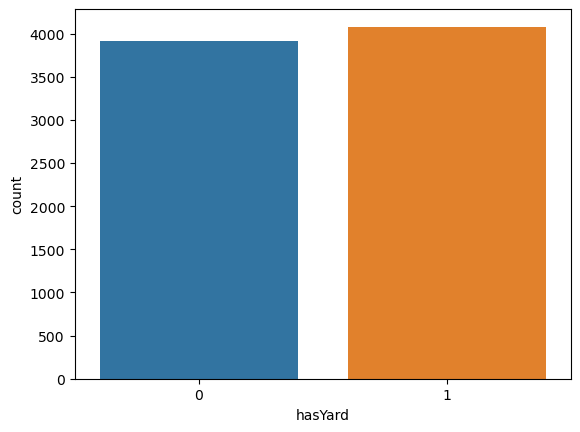

In [24]:
sns.countplot( x='hasYard' ,  data=X_train)

<Axes: xlabel='hasYard', ylabel='count'>

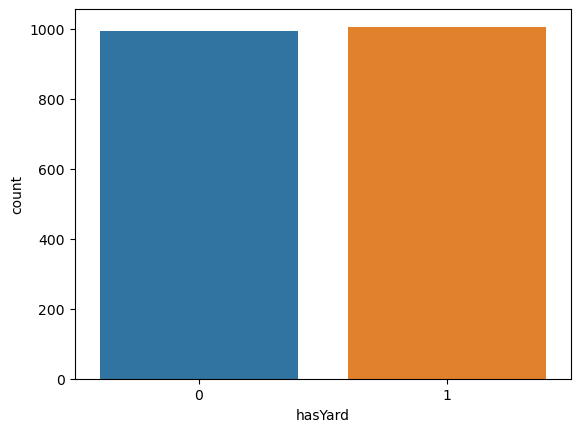

In [25]:
sns.countplot( x='hasYard' ,  data=X_test)

<Axes: xlabel='hasPool', ylabel='count'>

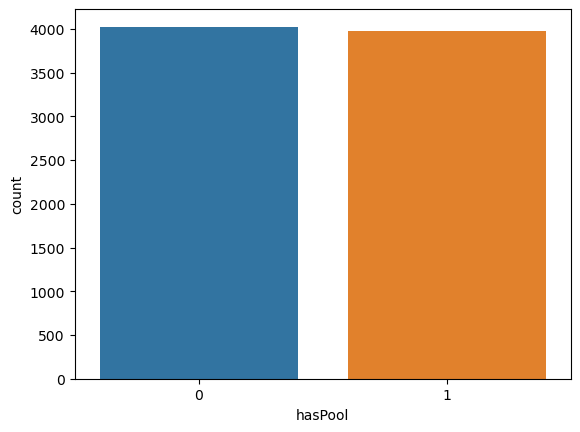

In [26]:
sns.countplot( x='hasPool' ,  data=X_train)

<Axes: xlabel='hasPool', ylabel='count'>

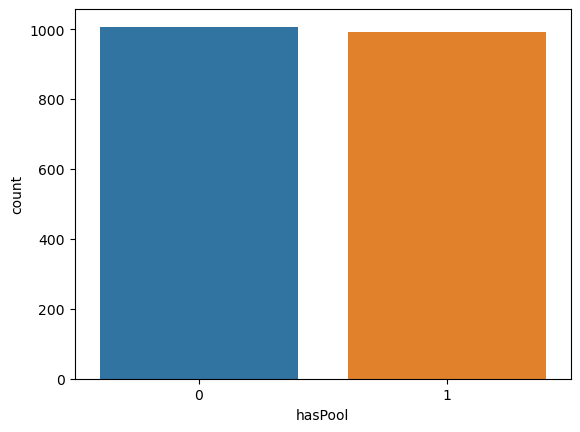

In [27]:
sns.countplot( x='hasPool' ,  data=X_test)

<Axes: xlabel='isNewBuilt', ylabel='count'>

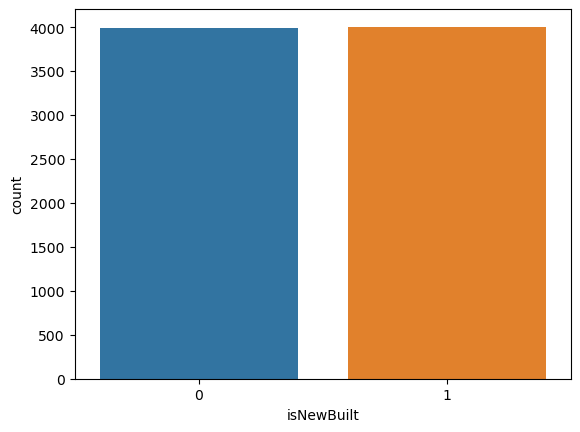

In [28]:
sns.countplot( x='isNewBuilt' ,  data=X_train)

<Axes: xlabel='isNewBuilt', ylabel='count'>

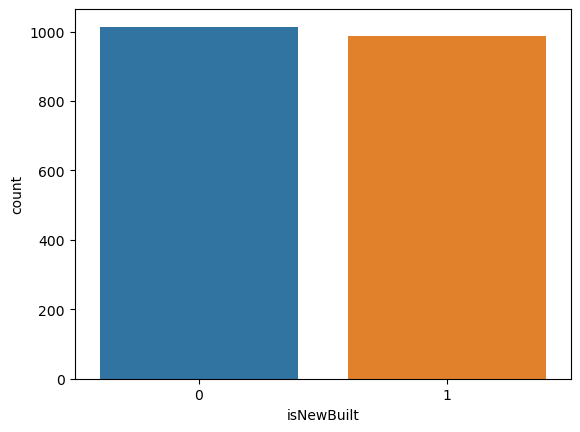

In [29]:
sns.countplot( x='isNewBuilt' ,  data=X_test)

# Training and test data looks similar

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [32]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [33]:
# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=0)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [34]:
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

0.9999995580186766

In [35]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

In [36]:
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

In [40]:
MAE = [linear_mae, rf_mae, xgb_mae]

In [41]:
MAE

[1489.360037401594, 3096.497843750004, 11816.81464550781]

In [42]:
MSE = [linear_mse, rf_mse, xgb_mse]

In [43]:
MSE



[3610647.792627632, 15048962.403312013, 208988348.19401094]

In [44]:
RMSE = [linear_rmse, rf_rmse , xgb_rmse]

In [45]:
RMSE

[1900.1704640972694, 3879.299215491377, 14456.429303047518]

In [46]:
R2 = [linear_r2, rf_r2, xgb_r2]

In [47]:
R2

[0.9999995580186766, 0.9999981578484799, 0.9999744176247509]

# All different models give similar accuracy